Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Training Loss: 2.1681215162472345
Validation Loss: 1.9491012035661441, Validation Accuracy: 30.15%
Epoch 2, Training Loss: 1.882588321443104
Validation Loss: 1.71073162935342, Validation Accuracy: 38.91%
Epoch 3, Training Loss: 1.7105373066404592
Validation Loss: 1.5739688167146817, Validation Accuracy: 43.6%
Epoch 4, Training Loss: 1.6049511940278056
Validation Loss: 1.4947722725048187, Validation Accuracy: 45.88%
Epoch 5, Training Loss: 1.5297163095315705
Validation Loss: 1.4426931666720444, Validation Accuracy: 47.91%
Epoch 6, Training Loss: 1.4693073604417883
Validation Loss: 1.3552808275647983, Validation Accuracy: 51.51%
Epoch 7, Training Loss: 1.4258477866192303
Validation Loss: 1.32045520414972, Validation Accuracy: 52.52%
Epoch 8, Training Loss: 1.390121516974076
Validation Loss: 1.3448028093690325, Validation Accuracy: 51.53%
Epoch 9, Training Loss: 1.354095960821947
Validation Loss: 1.306357

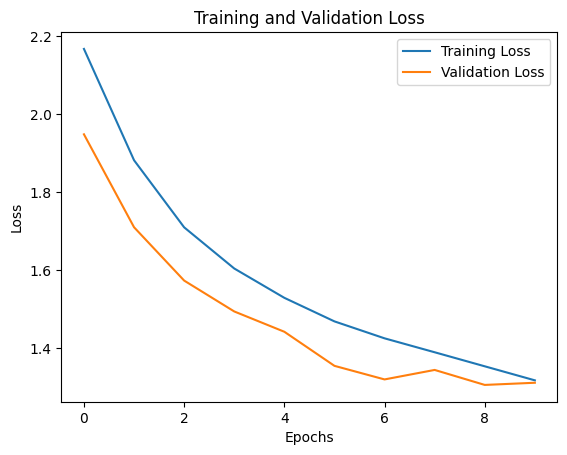

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define transformations for data preprocessing
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = datasets.CIFAR10(root='./data', download=True, train=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

valset = datasets.CIFAR10(root='./data', download=True, train=False, transform=val_transform)
valloader = DataLoader(valset, batch_size=64, shuffle=False)

# Define a Convolutional Neural Network
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 256)  # Adjusted for CNN output
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = nn.ReLU()(self.conv1(x))
        x = nn.MaxPool2d(2)(x)
        x = nn.ReLU()(self.conv2(x))
        x = nn.MaxPool2d(2)(x)
        x = x.view(x.size(0), -1)
        x = nn.ReLU()(self.fc1(x))
        return self.fc2(x)

model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
train_losses = []
val_losses = []
for epoch in range(10):
    model.train()
    running_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_train_loss = running_loss / len(trainloader)
    train_losses.append(avg_train_loss)
    print(f"Epoch {epoch + 1}, Training Loss: {avg_train_loss}")

    # Validation loop
    model.eval()
    running_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in valloader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    avg_val_loss = running_val_loss / len(valloader)
    accuracy = 100 * correct / total
    val_losses.append(avg_val_loss)
    print(f"Validation Loss: {avg_val_loss}, Validation Accuracy: {accuracy}%")

# Plotting losses
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
